In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow
!pip install keras

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
base_dir = r"/content/drive/MyDrive/Dataset/Srikar/clear background/train"

In [5]:
IMAGE_SIZE=(224)
BATCH_SIZE=16
#preproceessing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)
test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training'
)
test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation'
)


Found 164 images belonging to 4 classes.
Found 16 images belonging to 4 classes.


MobileNet

Epoch 1/20
11/11 [==============================] - 7s 449ms/step - loss: 8.5933 - accuracy: 0.5000 - val_loss: 1.2642 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - 4s 318ms/step - loss: 2.2369 - accuracy: 0.8232 - val_loss: 0.3189 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - 4s 323ms/step - loss: 1.5900 - accuracy: 0.8293 - val_loss: 0.1450 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/20
11/11 [==============================] - 4s 332ms/step - loss: 0.4042 - accuracy: 0.9085 - val_loss: 0.4384 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 5/20
11/11 [==============================] - 4s 318ms/step - loss: 0.3305 - accuracy: 0.9268 - val_loss: 0.4342 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 6/20
11/11 [==============================] - ETA: 0s - loss: 0.4674 - accuracy: 0.9268
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 [==============================] - 4s 391ms/step

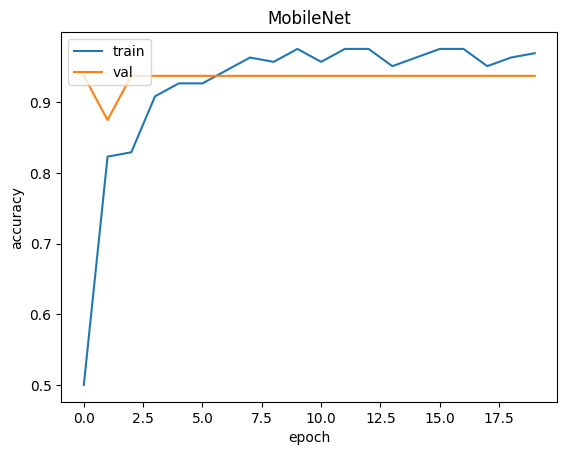

In [15]:
from keras.layers import Dense, activation, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
pretrained_model= tf.keras.applications.mobilenet.MobileNet(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model.add(pretrained_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4,activation="softmax"))
#compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_datagen,
    batch_size=32,
    epochs=20,
    validation_data=test_datagen,
    callbacks=[lr_callback],
    verbose=1
)
model.evaluate(train_datagen)
model.evaluate(test_datagen)

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNet')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

VGG-19

80134624/80134624 [==============================] - 0s 0us/step
Epoch 1/20
11/11 [==============================] - 70s 5s/step - loss: 3.6907 - accuracy: 0.3476 - val_loss: 1.1676 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - 4s 334ms/step - loss: 1.4533 - accuracy: 0.5183 - val_loss: 0.6389 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - 4s 338ms/step - loss: 0.8665 - accuracy: 0.6341 - val_loss: 0.7165 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/20
11/11 [==============================] - 4s 363ms/step - loss: 0.6780 - accuracy: 0.7256 - val_loss: 0.6006 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 5/20
11/11 [==============================] - 5s 403ms/step - loss: 0.5135 - accuracy: 0.7988 - val_loss: 0.5771 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/20
11/11 [==============================] - 4s 333ms/step - loss: 0.4189 - accuracy: 0.8354 - val_loss: 0.5700 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7

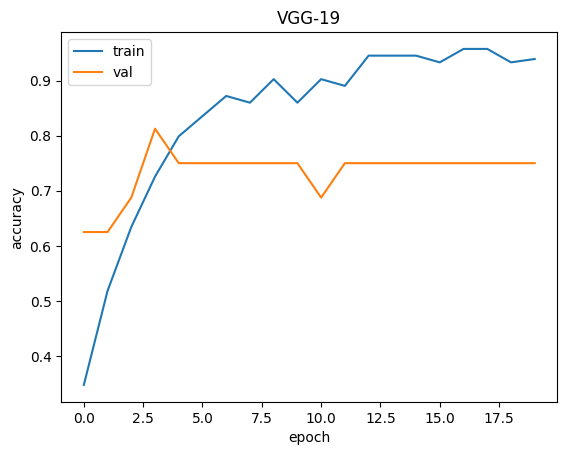

In [6]:
from keras.layers import Dense, activation, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
pretrained_model= tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model.add(pretrained_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4,activation="softmax"))
#compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_datagen,
    batch_size=32,
    epochs=20,
    validation_data=test_datagen,
    callbacks=[lr_callback],
    verbose=1
)
model.evaluate(train_datagen)
model.evaluate(test_datagen)

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG-19')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

InceptionV3

87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/20
11/11 [==============================] - 12s 568ms/step - loss: 7.2213 - accuracy: 0.4146 - val_loss: 0.9128 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - 4s 365ms/step - loss: 2.6146 - accuracy: 0.6037 - val_loss: 3.3499 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - 4s 386ms/step - loss: 1.9468 - accuracy: 0.5976 - val_loss: 0.4166 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 4/20
11/11 [==============================] - 4s 319ms/step - loss: 0.6689 - accuracy: 0.7439 - val_loss: 0.5382 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/20
11/11 [==============================] - 4s 341ms/step - loss: 0.6674 - accuracy: 0.8293 - val_loss: 0.5449 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 6/20
11/11 [==============================] - 5s 452ms/step - loss: 0.4510 - accuracy: 0.8476 - val_loss: 0.2747 - val_accuracy: 0.8750 - lr: 0.0010
Epoc

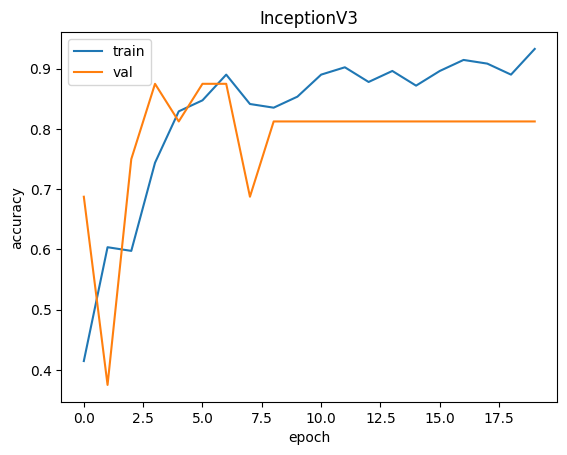

In [7]:
from keras.layers import Dense, activation, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
pretrained_model= tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model.add(pretrained_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4,activation="softmax"))
#compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_datagen,
    batch_size=32,
    epochs=20,
    validation_data=test_datagen,
    callbacks=[lr_callback],
    verbose=1
)
model.evaluate(train_datagen)
model.evaluate(test_datagen)

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('InceptionV3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Resnet152v2

Epoch 1/20
11/11 [==============================] - 18s 693ms/step - loss: 6.8770 - accuracy: 0.4756 - val_loss: 4.5802 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/20
11/11 [==============================] - 5s 447ms/step - loss: 1.9382 - accuracy: 0.7500 - val_loss: 2.2630 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/20
11/11 [==============================] - 4s 354ms/step - loss: 1.5340 - accuracy: 0.7866 - val_loss: 2.0368 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/20
11/11 [==============================] - 4s 346ms/step - loss: 0.9492 - accuracy: 0.8598 - val_loss: 0.5309 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 5/20
11/11 [==============================] - 4s 405ms/step - loss: 0.4274 - accuracy: 0.8902 - val_loss: 0.5615 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/20
11/11 [==============================] - 5s 400ms/step - loss: 0.4583 - accuracy: 0.8841 - val_loss: 0.9312 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/20
11/11 [==============================] - ETA: 0s - loss: 0

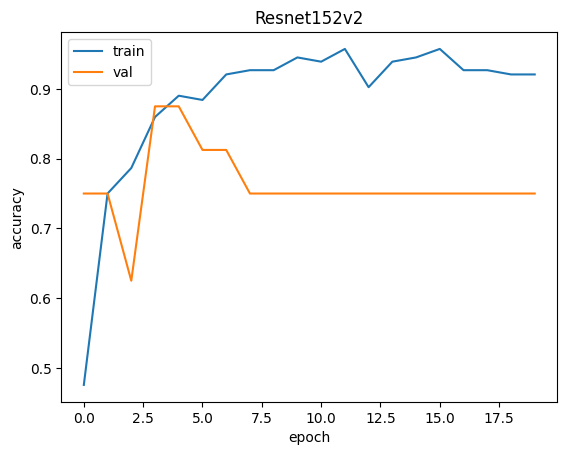

In [13]:
from keras.layers import Dense, activation, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
pretrained_model= tf.keras.applications.resnet_v2.ResNet152V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model.add(pretrained_model)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(4,activation="softmax"))
#compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_datagen,
    batch_size=32,
    epochs=20,
    validation_data=test_datagen,
    callbacks=[lr_callback],
    verbose=1
)
model.evaluate(train_datagen)
model.evaluate(test_datagen)

from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Resnet152v2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()